# Shock Front Classification Using Random Forest

> Abhishek Swami 

> B.Tech AIML Roll No. 13


In aerodynamics and fluid dynamics, "normal," "oblique," and "bow" shocks refer to different types of shock waves that occur when an object moves through a fluid (such as air or water) at supersonic speeds. Each type of shock wave has distinct characteristics and effects on the flow properties of the fluid. Here's a brief explanation of each:

### Normal Shock
A **normal shock** is a type of shock wave that is perpendicular (normal) to the direction of the flow. It occurs when the flow encounters a sudden, almost vertical obstacle, causing a sharp increase in pressure, temperature, and density, and a decrease in velocity. Normal shocks are characterized by:

- A sudden and drastic change in flow properties.
- The shock wave is perpendicular to the flow direction.
- A significant loss of total pressure.
- Occurs typically in ducts, nozzles, or around blunt bodies.

### Oblique Shock
An **oblique shock** is a type of shock wave that forms at an angle (oblique) to the direction of the flow. It occurs when the flow encounters a wedge-shaped or angled object. The characteristics of oblique shocks include:

- The shock wave is at an angle to the flow direction.
- Flow properties (pressure, temperature, and density) change across the shock, but not as drastically as in a normal shock.
- Velocity decreases, but less drastically compared to a normal shock.
- Occurs in areas where the flow is deflected by an angled surface or a corner.

### Bow Shock
A **bow shock** forms when a supersonic flow encounters a blunt object, creating a shock wave that stands off from the surface of the object and wraps around it in a bow shape. Characteristics of bow shocks include:

- The shock wave forms a curved, bow-like shape around the front of the object.
- Significant changes in flow properties occur across the shock wave.
- Bow shocks are often seen in front of blunt objects like space capsules, aircraft noses, or in astrophysical phenomena like around stars and planets.

### Visual Representation
1. **Normal Shock**:
   ```
   Flow ----->|  Shock Wave
              |
   ```

2. **Oblique Shock**:
   ```
   Flow ----->\
              \
              Shock Wave
   ```

3. **Bow Shock**:
   ```
              Shock Wave
              -----
    Flow ----->|    |
              -----|
   ```

### Examples and Applications
- **Normal Shock**: Occurs in supersonic wind tunnels, around blunt objects in high-speed flows, and in certain sections of jet engines.
- **Oblique Shock**: Found in supersonic aircraft wings, rocket nozzles, and the flow over sharp edges or corners.
- **Bow Shock**: Commonly seen in front of spacecraft re-entering the Earth's atmosphere, around high-speed aircraft, and in astrophysical contexts around stars or planets.

Understanding these types of shocks is crucial for designing high-speed vehicles and for predicting and managing the aerodynamic heating and structural loads on supersonic and hypersonic aircraft and spacecraft.

Accuracy: 73.91%
Predicted Shock Front Type: oblique


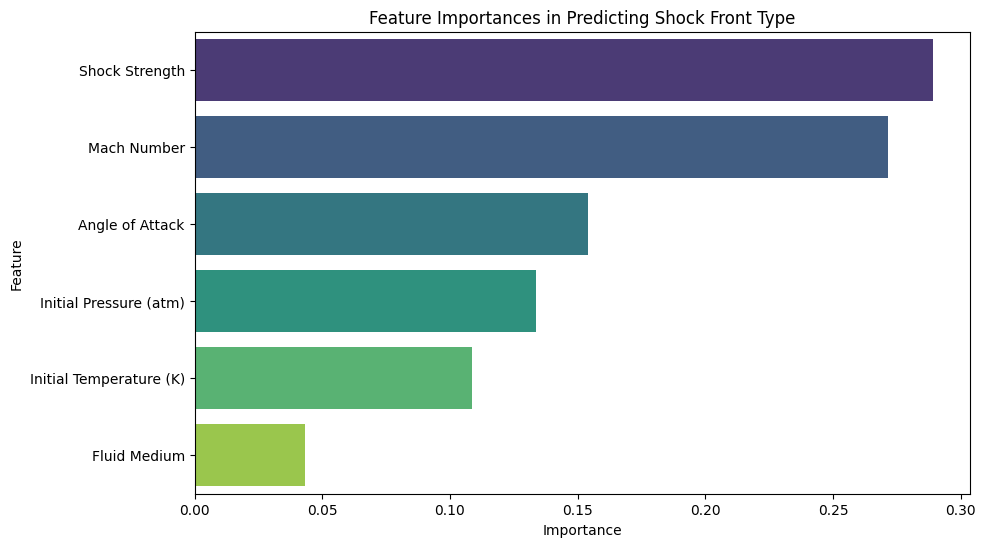

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('shock_front_dataset.csv')

# Separate features and target variable using .iloc
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Encode categorical variables
le_fluid = LabelEncoder()
X.iloc[:,3] = le_fluid.fit_transform(X.iloc[:,3])

le_shock = LabelEncoder()
y = le_shock.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Function to predict shock front type for new data
def predict_shock_front(mach_number, shock_strength, angle_of_attack, fluid_medium, initial_temp, initial_pressure):
    # Prepare the input data
    input_data = pd.DataFrame({
        'Mach Number': [mach_number],
        'Shock Strength': [shock_strength],
        'Angle of Attack': [angle_of_attack],
        'Fluid Medium': [fluid_medium],
        'Initial Temperature (K)': [initial_temp],
        'Initial Pressure (atm)': [initial_pressure]
    })
    
    # Encode the fluid medium
    input_data['Fluid Medium'] = le_fluid.transform(input_data['Fluid Medium'])
    
    # Predict the shock front type
    prediction = rf.predict(input_data)
    
    # Decode the predicted label
    shock_front_type = le_shock.inverse_transform(prediction)
    
    return shock_front_type[0]

# Example usage of the prediction function
test_prediction = predict_shock_front(2.5, 1.1, 5, 'air', 300, 1)
print(f'Predicted Shock Front Type: {test_prediction}')

# Plot feature importance
feature_importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances in Predicting Shock Front Type')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


1. **Imports necessary libraries**: Imports the required libraries for data processing, modeling, evaluation, and visualization.
2. **Loads the dataset**: Loads the dataset containing shock front data from a CSV file.
3. **Separates features and target variable**: Splits the dataset into features (X) and the target variable (y) using `.iloc`.
4. **Encodes categorical variables**: Uses `LabelEncoder` to encode categorical variables ('Fluid Medium' and 'Shock Front Type').
5. **Splits the dataset into training and testing sets**: Splits the data into training and testing sets for model evaluation.
6. **Initializes and trains the Random Forest classifier**: Creates a Random Forest classifier with 100 trees and trains it on the training data.
7. **Predicts on the test data**: Uses the trained model to make predictions on the test data.
8. **Calculates accuracy**: Computes the accuracy of the model predictions on the test data.
9. **Defines a function for making predictions**: Defines a function `predict_shock_front` to predict shock front type for new data.
10. **Example usage of the prediction function**: Provides an example of using the prediction function with sample input values.
11. **Plots feature importance**: Calculates and plots the feature importances to visualize the importance of each feature in predicting shock front type.